In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/AAPL.csv')

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,1.542857,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,1.538571,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400


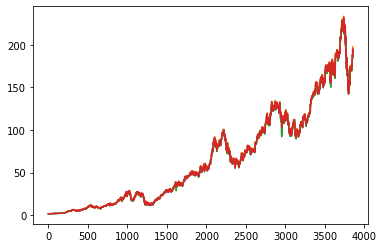

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure()
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.plot(dataset["Close"])
plt.show()

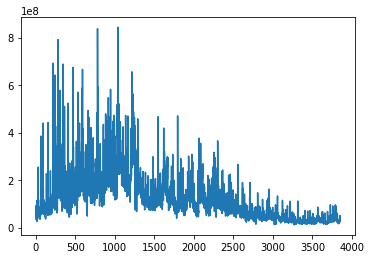

In [8]:
plt.figure()
plt.plot(dataset["Volume"])
plt.show()

In [9]:
print("checking if any null values are present\n", dataset.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
train = dataset[0:(len(dataset)-60)]
test = dataset[(len(dataset)-60):len(dataset)]
print(train.shape)
print(test.shape)

(3793, 7)
(60, 7)


In [11]:
train_set = train.iloc[:,1:2].values
train_set.shape

(3793, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

train_scaled = scaler.fit_transform(train_set)

In [0]:
X_train = []
y_train = []
for i in range(1, len(train_set)):
    X_train.append(train_scaled[i-1:i, 0])
    y_train.append(train_scaled[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
#!pip install tensorflow==2.0

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





3792/3792 [==============================] - 4s 943us/step - loss: 0.0522
Epoch 2/50
3792/3792 [==============================] - 1s 239us/step - loss: 0.0034
Epoch 3/50
3792/3792 [==============================] - 1s 251us/step - loss: 0.0023
Epoch 4/50
3792/3792 [==============================] - 1s 238us/step - loss: 0.0019
Epoch 5/50
3792/3792 [==============================] - 1s 242us/step - loss: 0.0018
Epoch 6/50
3792/3792 [==============================] - 1s 234us/step - loss: 0.0016
Epoch 7/50
3792/3792 [==============================] - 1s 244us/step - loss: 0.0016
Epoch 8/50
3792/3792 [==============================] - 1s 234us/step - loss: 0.0015
Epoch 9/50
3792/3792 [==============================] - 1s 238us/step - loss: 0.0014
Epoch 10/50
3792/3792 [==============================] - 1s 243us/step - loss: 0.0014
Epoch 11/50
3792/3792 [========================

In [26]:
y_test = test.iloc[:,1:2].values
total = dataset['Open']
input_tests = total[len(total) - len(test) - 1:].values
total.shape

(3853,)

In [27]:
input_tests.shape

(61,)

In [0]:
input_tests = input_tests.reshape(-1,1)
input_tests = scaler.transform(input_tests)

In [0]:
X_test = []
for i in range(1, len(input_tests)):
    X_test.append(input_tests[i-1:i,0])

In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

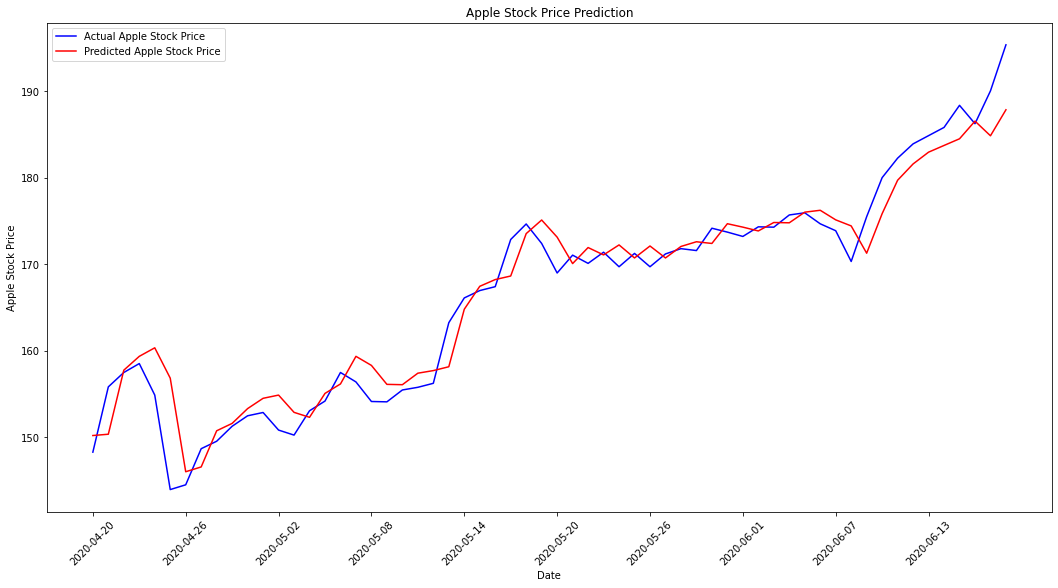

In [33]:
plt.figure(figsize = (18,9))
plt.plot(y_test, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.xticks(range(0,test.shape[0],6),test['Date'].loc[::6],rotation=45)
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

9.561142099677122